# EXPLORACIÓN INICIAL - DATASETS TRANSPORTE DE MERCANCÍAS POR CARRETERA EN ESPAÑA (2017-2024) - MITMA

In [45]:

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import tex as tx

# Configuración para mejor visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente!")

✅ Librerías importadas correctamente!


In [46]:
# Definir la ruta base donde están los datos
import os

# Ruta a la carpeta de datos
ruta_datos = os.path.join('..', 'data', 'raw', 'csv')

# Listar todos los archivos CSV disponibles
archivos_csv = [f for f in os.listdir(ruta_datos) if f.endswith('.csv')]
print(f"📁 Se encontraron {len(archivos_csv)} archivos CSV:")
for archivo in archivos_csv:
    print(f"   - {archivo}")

📁 Se encontraron 8 archivos CSV:
   - CO280_Trafico_Total_Merc_Veh_Espanyoles_Carr__CCAA_TipoMercancia_TipoDesplaz_Anyo.csv
   - CO282_CO281_Flujos_Nac_Merc_Veh_Espanyoles_Carr_entre_CCAAs_Anyo.csv
   - CO285_OperVacio_Veh_Espanyoles_Carr__CCAA_TipoDesplaz_Anyo.csv
   - CO497_indice_precios_TRM_Carr__tramosDistancias.csv
   - CO516_Superficie_Instalacs_Logistica_Carr__TipoInstalac_CCAA_Provincia.csv
   - CO519_Trafico_Total_Merc__ModoTransporte_TipoTrafico_Anyo.csv
   - CO597_CO598_TRM_int_CAR_Tn_TnKm_Merc_RecibExped_ESP__paises_OrigenDestino.csv
   - CO614_Coste_TRM_Carr__tipo_veh.csv


In [47]:
resumen_general = []

for archivo in archivos_csv:
    path = os.path.join(ruta_datos, archivo)
    df = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')
    
    resumen = {
        "archivo": archivo,
        "filas": df.shape[0],
        "columnas": df.shape[1],
        "columnas_nombres": list(df.columns[:5]),
        "anios_unicos": [col for col in df.columns if "Año" in col or "Anyo" in col or "year" in col],
    }
    resumen_general.append(resumen)

pd.DataFrame(resumen_general)

,archivo,filas,columnas,columnas_nombres,anios_unicos
0,CO280_Trafico_Total_Merc_Veh_Espanyoles_Carr__...,15200,10,"[year2, comunidad2, Tipo_transporte3, tipo_des...",[year2]
1,CO282_CO281_Flujos_Nac_Merc_Veh_Espanyoles_Car...,3600,5,"[year, ComunidadOrigen, Unidad, ComunidadDesti...",[year]
2,CO285_OperVacio_Veh_Espanyoles_Carr__CCAA_Tipo...,1728,13,"[comunidad, Estado_Operacion, year, Tipo_trans...",[year]
3,CO497_indice_precios_TRM_Carr__tramosDistancia...,96,4,"[year, nombreOPTMC_tram_dist, nombreOTRVC_conc...",[year]
4,CO516_Superficie_Instalacs_Logistica_Carr__Tip...,10402,17,"[year, comunidad, provincia, nombreAliMkt_tipo...",[year]
5,CO519_Trafico_Total_Merc__ModoTransporte_TipoT...,66,7,"[year, TipoTrafico, ModoTransporte, Textbox15,...",[year]
6,CO597_CO598_TRM_int_CAR_Tn_TnKm_Merc_RecibExpe...,992,9,"[nombreZonaAreaGeoMundo, Pais, tipo_desplazami...",[year]
7,CO614_Coste_TRM_Carr__tipo_veh.csv,4162,12,"[vehiculo, tipo_coste_anual, super_tipo_costes...",[year]


# EXPLORACIÓN DATASET TONELADAS TRANSPORTADAS POR CCAA Y TIPO DE MERCANCÍA 2017-2024

In [48]:

path = os.path.join(ruta_datos, "CO280_Trafico_Total_Merc_Veh_Espanyoles_Carr__CCAA_TipoMercancia_TipoDesplaz_Anyo.csv")
df_280 = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')

In [67]:
# Vista general
print("Shape:", df_280.shape)
print("\nColumnas:")
print(df_280.columns.tolist())
df_280.tail(10)

Shape: (15200, 10)

Columnas:
['year2', 'comunidad2', 'Tipo_transporte3', 'tipo_desplazamiento2', 'Tipo_mercancia2', 'Unidad2', 'valor2', 'Textbox3', 'Textbox277', 'Textbox279']


,year2,comunidad2,Tipo_transporte3,tipo_desplazamiento2,Tipo_mercancia2,Unidad2,valor2,Textbox3,Textbox277,Textbox279
15190,2024,Total 2024,Transporte internacional 2024,Recibido,Productos metalúrgicos,Miles de toneladas,"1.503,96","4.001,30",Total 2024,"47.805,25"
15191,2024,Total 2024,Transporte internacional 2024,Recibido,Productos metalúrgicos,Millones de toneladas-kilómetro,"1.399,70","3.597,15",Total 2024,"11.921,44"
15192,2024,Total 2024,Transporte internacional 2024,Recibido,Minerales en bruto o manufacturados y material...,Miles de toneladas,"1.299,85","8.097,53",Total 2024,"576.862,99"
15193,2024,Total 2024,Transporte internacional 2024,Recibido,Minerales en bruto o manufacturados y material...,Millones de toneladas-kilómetro,"685,89","3.876,85",Total 2024,"31.544,71"
15194,2024,Total 2024,Transporte internacional 2024,Recibido,Abonos,Miles de toneladas,"353,78","1.083,21",Total 2024,"30.046,58"
15195,2024,Total 2024,Transporte internacional 2024,Recibido,Abonos,Millones de toneladas-kilómetro,"309,98","669,13",Total 2024,"4.146,78"
15196,2024,Total 2024,Transporte internacional 2024,Recibido,Productos químicos,Miles de toneladas,"3.297,80","6.776,54",Total 2024,"60.311,20"
15197,2024,Total 2024,Transporte internacional 2024,Recibido,Productos químicos,Millones de toneladas-kilómetro,"3.292,82","6.634,32",Total 2024,"16.377,41"
15198,2024,Total 2024,Transporte internacional 2024,Recibido,"Máquinas, vehículos, objetos manufacturados y ...",Miles de toneladas,"13.555,98","26.057,45",Total 2024,"346.178,48"
15199,2024,Total 2024,Transporte internacional 2024,Recibido,"Máquinas, vehículos, objetos manufacturados y ...",Millones de toneladas-kilómetro,"15.468,73","27.276,81",Total 2024,"83.600,02"


In [50]:
# Tipos de datos
df_280.info()

# Valores nulos
print("\nPorcentaje de nulos por columna:")
print(df_280.isna().mean().round(3)*100)

# Valores únicos por columna
print("\nValores únicos por columna:")
for c in df_280.columns:
    print(f"{c}: {df_280[c].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year2                 15200 non-null  int64 
 1   comunidad2            15200 non-null  object
 2   Tipo_transporte3      15200 non-null  object
 3   tipo_desplazamiento2  15200 non-null  object
 4   Tipo_mercancia2       15200 non-null  object
 5   Unidad2               15200 non-null  object
 6   valor2                13496 non-null  object
 7   Textbox3              14104 non-null  object
 8   Textbox277            15200 non-null  object
 9   Textbox279            15068 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB

Porcentaje de nulos por columna:
year2                   0.00
comunidad2              0.00
Tipo_transporte3        0.00
tipo_desplazamiento2    0.00
Tipo_mercancia2         0.00
Unidad2                 0.00
valor2                 11.20
Text

In [51]:
# Copia de trabajo
df = df_280.copy()

# Renombrar columnas
df.columns = ['año', 'ccaa', 'desplazamiento', 'subtipo',
              'mercancia', 'unidad', 'valor', 'textbox3', 'textbox277', 'textbox279']

In [52]:
# Eliminar columnas innecesarias
df = df.drop(columns=['textbox3', 'textbox277', 'textbox279'])

# Normalizar texto
for c in ['ccaa', 'desplazamiento', 'subtipo', 'mercancia', 'unidad']:
    df[c] = df[c].astype(str).str.strip().str.lower()

# Convertir valor a numérico
df['valor'] = (df['valor']
               .astype(str)
               .str.replace('.', '', regex=False)
               .str.replace(',', '.', regex=False)
               .astype(float))

# Filtrar filas no nulas
df = df.dropna(subset=['valor'])
df

,año,ccaa,desplazamiento,subtipo,mercancia,unidad,valor
0,2017,andalucía,transporte intrarregional,intramunicipal,productos agrícolas y animales vivos,miles de toneladas,3372.36
1,2017,andalucía,transporte intrarregional,intramunicipal,productos agrícolas y animales vivos,millones de toneladas-kilómetro,31.79
2,2017,andalucía,transporte intrarregional,intramunicipal,productos alimenticios y forrajes,miles de toneladas,2702.69
3,2017,andalucía,transporte intrarregional,intramunicipal,productos alimenticios y forrajes,millones de toneladas-kilómetro,28.95
6,2017,andalucía,transporte intrarregional,intramunicipal,productos petrolíferos,miles de toneladas,1343.97
...,...,...,...,...,...,...,...
15195,2024,total 2024,transporte internacional 2024,recibido,abonos,millones de toneladas-kilómetro,309.98
15196,2024,total 2024,transporte internacional 2024,recibido,productos químicos,miles de toneladas,3297.80
15197,2024,total 2024,transporte internacional 2024,recibido,productos químicos,millones de toneladas-kilómetro,3292.82
15198,2024,total 2024,transporte internacional 2024,recibido,"máquinas, vehículos, objetos manufacturados y ...",miles de toneladas,13555.98


In [53]:
# Crear campo de toneladas normalizadas
df['toneladas'] = np.where(
    df['unidad'].str.contains('miles de toneladas', case=False),
    df['valor'] * 1000,  # convertir a toneladas
    np.nan
)


# Quitar los años incrustados (4 dígitos consecutivos) dentro del texto
df['desplazamiento'] = df['desplazamiento'].str.replace(r'\b20\d{2}\b', '', regex=True)

# Eliminar espacios redundantes
df['desplazamiento'] = df['desplazamiento'].str.strip()

# Comprobar valores únicos limpios
print(df['desplazamiento'].unique())

# Revisar las filas con totales
df[df['ccaa'].str.contains('total', case=False)].head(10)

# Filtrar las filas que NO son totales
df = df[~df['ccaa'].str.contains('total', case=False)].copy()



print("Filas después de limpiar:", df.shape[0])
print("Comunidades únicas:", df['ccaa'].nunique())


['transporte intrarregional' 'transporte interregional'
 'transporte internacional']
Filas después de limpiar: 12706
Comunidades únicas: 15


In [54]:
# Filtrar solo toneladas
df_ton = df[df['unidad'].str.contains('miles de toneladas', case=False)].copy()

df_ton = df_ton.drop(columns=['unidad','valor'])

df_ton.head()

,año,ccaa,desplazamiento,subtipo,mercancia,toneladas
0,2017,andalucía,transporte intrarregional,intramunicipal,productos agrícolas y animales vivos,3372360.00
2,2017,andalucía,transporte intrarregional,intramunicipal,productos alimenticios y forrajes,2702690.00
6,2017,andalucía,transporte intrarregional,intramunicipal,productos petrolíferos,1343970.00
8,2017,andalucía,transporte intrarregional,intramunicipal,minerales y residuos para refundición,747910.00
10,2017,andalucía,transporte intrarregional,intramunicipal,productos metalúrgicos,368120.00


In [55]:
# Filtrar solo toneladas-km
df_ton_km = df[df['unidad'].str.contains('millones de toneladas-kilómetro', case=False)].copy()

# Eliminar columnas innecesarias
df_ton_km= df_ton_km.drop(columns=['toneladas','unidad'])

df_ton_km.columns=['año','ccaa','desplazamiento','subtipo','mercancia','ton-km']

df_ton_km['ton-km'] = df_ton_km['ton-km']* 1000000  # convertir a mill. toneladas-km

df_ton_km['ton-km']=df_ton_km['ton-km'].round(2)
# Vista previa
df_ton_km.head(10)



,año,ccaa,desplazamiento,subtipo,mercancia,ton-km
1,2017,andalucía,transporte intrarregional,intramunicipal,productos agrícolas y animales vivos,31790000.00
3,2017,andalucía,transporte intrarregional,intramunicipal,productos alimenticios y forrajes,28950000.00
7,2017,andalucía,transporte intrarregional,intramunicipal,productos petrolíferos,16270000.00
9,2017,andalucía,transporte intrarregional,intramunicipal,minerales y residuos para refundición,3440000.00
11,2017,andalucía,transporte intrarregional,intramunicipal,productos metalúrgicos,3730000.00
13,2017,andalucía,transporte intrarregional,intramunicipal,minerales en bruto o manufacturados y material...,295690000.00
15,2017,andalucía,transporte intrarregional,intramunicipal,abonos,6180000.00
17,2017,andalucía,transporte intrarregional,intramunicipal,productos químicos,3190000.00
19,2017,andalucía,transporte intrarregional,intramunicipal,"máquinas, vehículos, objetos manufacturados y ...",21650000.00
21,2017,andalucía,transporte intrarregional,intermunicipal intrarregional,productos agrícolas y animales vivos,1300760000.00


In [56]:
keys = ['año','ccaa','desplazamiento','subtipo','mercancia']
dups_ton_km = df_ton_km.duplicated(subset=keys).sum()
dups_ton    = df_ton.duplicated(subset=keys).sum()
print('Duplicados ton_km:', dups_ton_km, ' | Duplicados toneladas:', dups_ton)

# Cardinalidad de claves
print('Registros ton_km:', len(df_ton_km), ' | Registros toneladas:', len(df_ton))
print('Claves únicas ton_km:', df_ton_km[keys].drop_duplicates().shape[0])
print('Claves únicas toneladas:', df_ton[keys].drop_duplicates().shape[0])

Duplicados ton_km: 0  | Duplicados toneladas: 0
Registros ton_km: 6353  | Registros toneladas: 6353
Claves únicas ton_km: 6353
Claves únicas toneladas: 6353


In [69]:
df_final = df_ton_km.merge(
    df_ton,
    on=['año','ccaa','desplazamiento','subtipo','mercancia'],
    how='inner',
    validate='one_to_one'  # ver si hay duplicados en las claves
)
df_final.sample(5)

,año,ccaa,desplazamiento,subtipo,mercancia,ton-km,toneladas
985,2018,cantabria,transporte interregional,expedido,combustibles minerales sólidos,1110000.00,13870.00
3373,2021,"asturias, principado de",transporte internacional,recibido,"máquinas, vehículos, objetos manufacturados y ...",262510000.00,182880.00
1162,2018,cataluña,transporte interregional,recibido,productos químicos,987550000.00,1934340.00
4312,2022,castilla y león,transporte internacional,expedido,productos alimenticios y forrajes,477590000.00,548490.00
5568,2023,"rioja, la",transporte internacional,expedido,productos químicos,21200000.00,17980.00


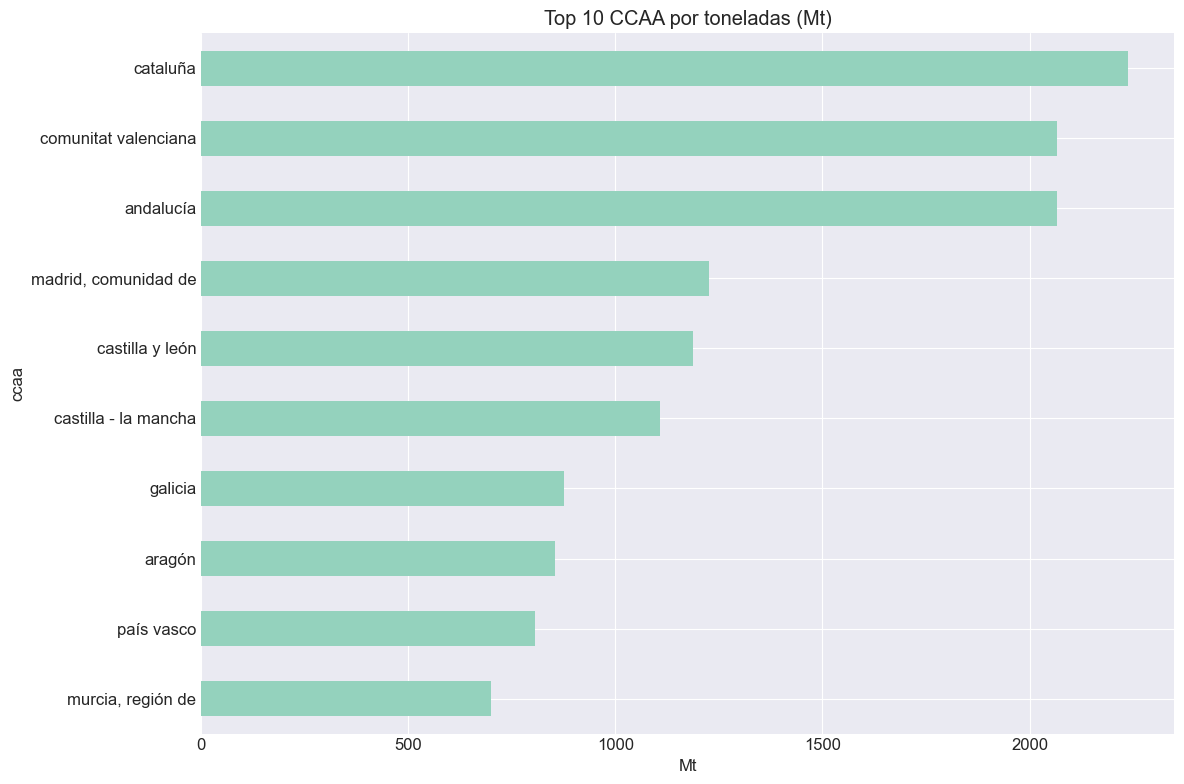

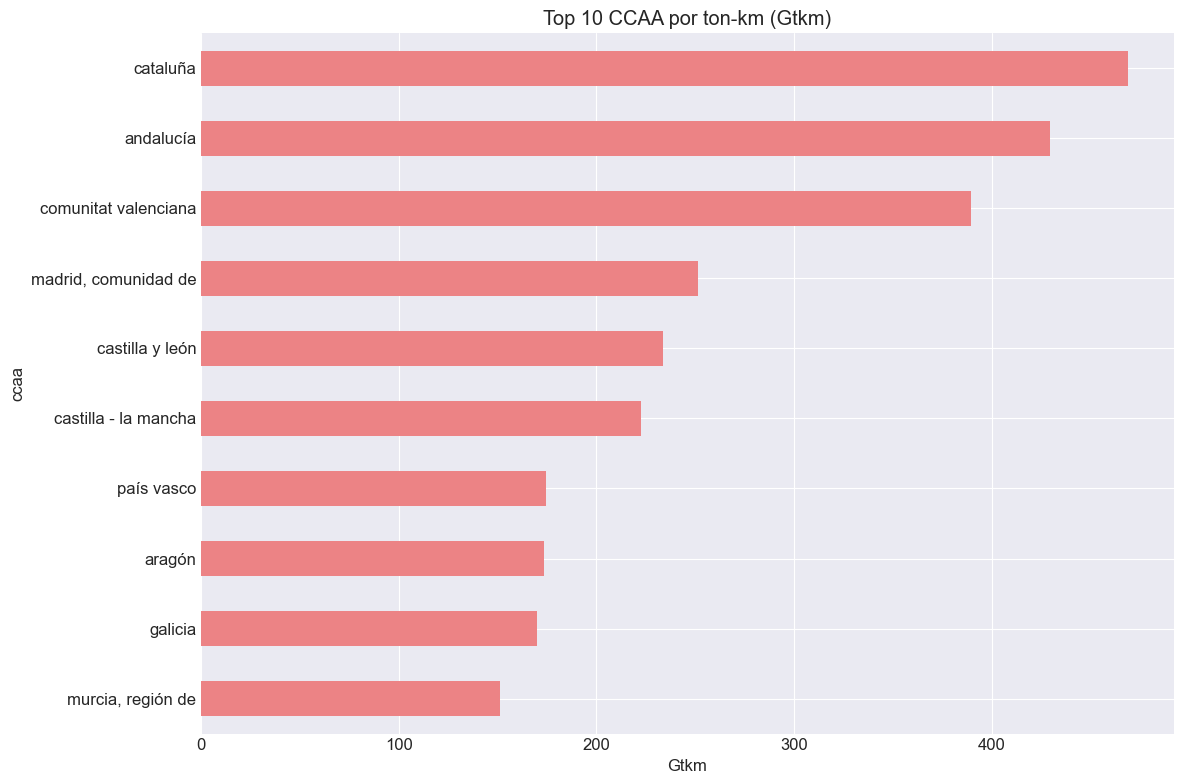

In [58]:
ccaa = df_final.groupby('ccaa')[['toneladas','ton-km']].sum()

top10_ton = ccaa.sort_values('toneladas', ascending=False).head(10)
top10_tkm = ccaa.sort_values('ton-km', ascending=False).head(10)

# Toneladas (Mt)
ax = (top10_ton['toneladas']/1e6).sort_values().plot(kind='barh',color='#94D2BD')
ax.set_title('Top 10 CCAA por toneladas (Mt)')
ax.set_xlabel('Mt'); plt.tight_layout(); plt.show()

# Ton-km (Gtkm)
ax = (top10_tkm['ton-km']/1e9).sort_values().plot(kind='barh',color='#EC8385')
ax.set_title('Top 10 CCAA por ton-km (Gtkm)')
ax.set_xlabel('Gtkm'); plt.tight_layout(); plt.show()

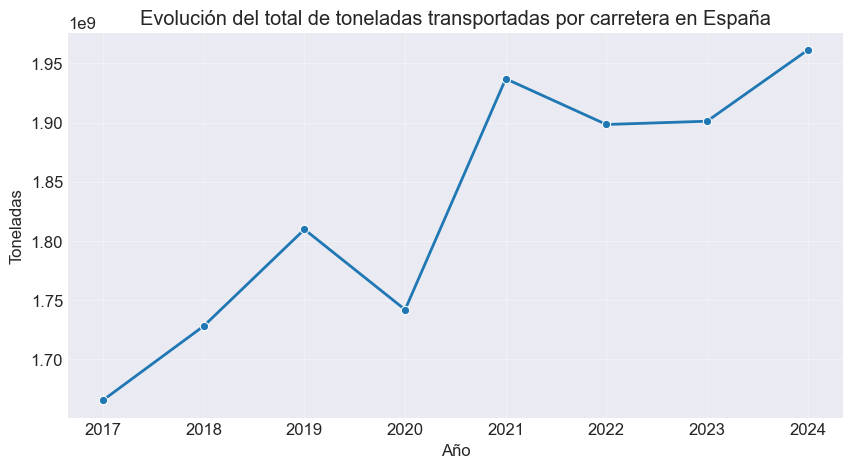

In [59]:
# Total nacional por año
evolucion = df_final.groupby('año')['toneladas'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=evolucion, x='año', y='toneladas', marker='o', linewidth=2)
plt.title('Evolución del total de toneladas transportadas por carretera en España')
plt.xlabel('Año')
plt.ylabel('Toneladas')
plt.grid(True, alpha=0.3)
plt.show()

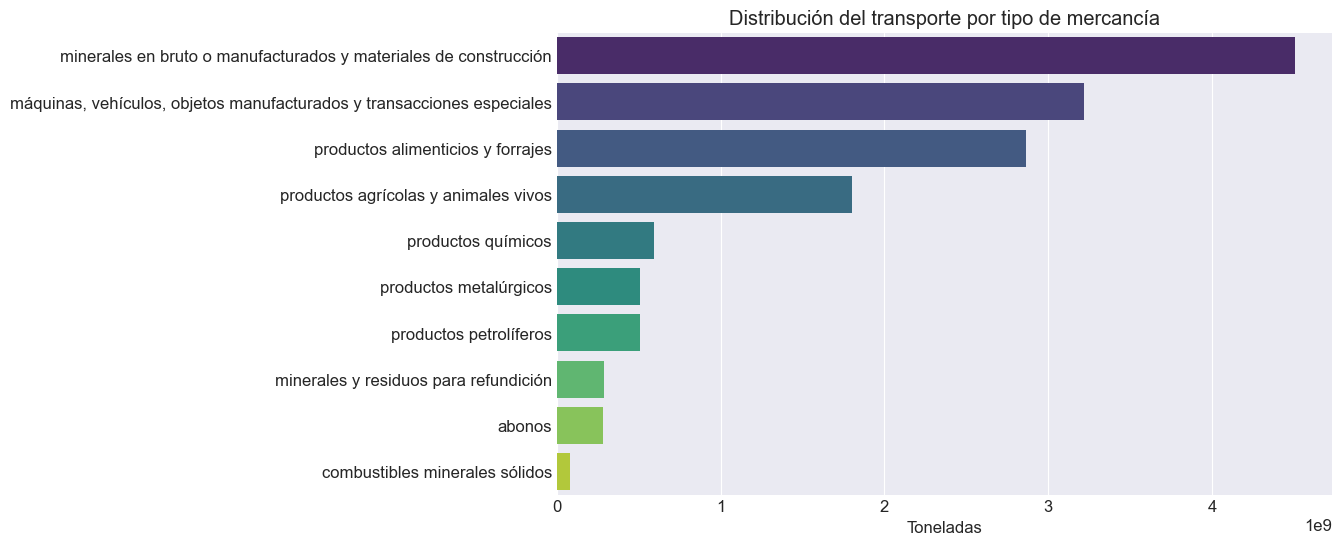

In [60]:
# Toneladas por tipo de mercancía
mercancias = (
    df_final.groupby('mercancia')['toneladas']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=mercancias, y='mercancia', x='toneladas', palette="viridis")
plt.title('Distribución del transporte por tipo de mercancía')
plt.xlabel('Toneladas')
plt.ylabel('')
plt.show()

In [61]:
df_final_pie=df_final.groupby('desplazamiento')['toneladas'].sum()


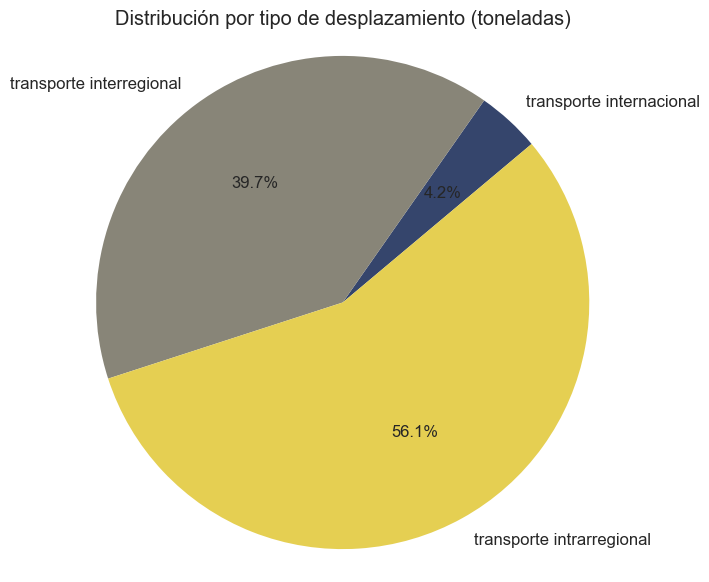

In [62]:
# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    df_final_pie,
    labels=df_final_pie.index,
    autopct='%1.1f%%',
    startangle=40,
    colors=plt.cm.cividis(np.linspace(0.2, 0.9, len(df_final_pie)))
)
plt.title('Distribución por tipo de desplazamiento (toneladas)')
plt.axis('equal')
plt.show()

In [63]:
# Obtener estadísticas preliminares columnas numéricas
df_final.describe().round(2)

,año,ton-km,toneladas
count,6353.00,6353.00,6353.00
mean,2020.48,462350022.04,2304799.36
std,2.29,925040976.06,5353403.04
min,2017.00,0.00,150.00
25%,2018.00,20350000.00,135980.00
50%,2020.00,107760000.00,561700.00
75%,2022.00,451370000.00,1990790.00
max,2024.00,8766090000.00,69220520.00


In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   año             6353 non-null   int64  
 1   ccaa            6353 non-null   object 
 2   desplazamiento  6353 non-null   object 
 3   subtipo         6353 non-null   object 
 4   mercancia       6353 non-null   object 
 5   ton-km          6353 non-null   float64
 6   toneladas       6353 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 347.6+ KB


In [65]:

ruta_guardado = os.path.join(ruta_datos, '..','..', 'interim', 'CO280_trafico_toneladas.csv')
df_ton.to_csv(ruta_guardado, index=False, encoding='utf-8-sig')
df_ton_km.to_csv(ruta_guardado, index=False, encoding='utf-8-sig')
print(f"✅ Dataset final guardado en: {ruta_guardado}")

✅ Dataset final guardado en: ..\data\raw\csv\..\..\interim\CO280_trafico_toneladas.csv


In [66]:

ruta_guardado_final = os.path.join(ruta_datos, '..','..', 'processed', 'CO280_trafico_total_ccaa_tipo_desplaz_y_mercancia_clean.csv')
df_final.to_csv(ruta_guardado_final, index=False, encoding='utf-8-sig')